# Continue working in your model file with the titanic dataset.

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

# Data modeling
from model import map_setosa_knn, train_validate_test_split

# acquire, prepare
import acquire
import prepare

In [6]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df = df.drop(columns=['pclass', 'passenger_id', 'sex', 'embark_town'])
df.head()

,survived,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,0,1,0,1,0,0
2,1,0,0,7.9250,1,1,0,0,0,1
3,1,1,0,53.1000,0,1,0,0,0,1
4,0,0,0,8.0500,1,0,1,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [12]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# Explore your data here. 

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['fare', 'sex_female']]
y_train = train.survived

X_validate = validate[['fare', 'sex_female']]
y_validate = validate.survived

X_test = test[['fare', 'sex_female']]
y_test = test.survived

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
# Create KNN object

knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [14]:
# Fit the model to training data

knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# Make predictions

y_pred = knn1.predict(X_train)
y_pred[:5]

array([0, 0, 0, 1, 1])

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [16]:
# accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.89


In [17]:
# confusion matrix

print(confusion_matrix(y_train, y_pred))

[[282  25]
 [ 32 159]]


In [18]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,282,25
1,32,159


## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       307
           1       0.86      0.83      0.85       191

    accuracy                           0.89       498
   macro avg       0.88      0.88      0.88       498
weighted avg       0.89      0.89      0.89       498



## 4. Run through steps 2-4 setting k to 10

In [20]:
knn10  = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [21]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:
y_pred = knn10.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [25]:
# accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [24]:
# confusion matrix

print(confusion_matrix(y_train, y_pred))

[[266  41]
 [ 70 121]]


In [26]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,266,41
1,70,121


In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       307
           1       0.75      0.63      0.69       191

    accuracy                           0.78       498
   macro avg       0.77      0.75      0.76       498
weighted avg       0.77      0.78      0.77       498



## 5. Run through setps 2-4 setting k to 20

In [29]:
knn20  = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [30]:
knn20.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [31]:
y_pred = knn20.predict(X_train)

In [32]:
# accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [33]:
# confusion matrix

print(confusion_matrix(y_train, y_pred))

[[260  47]
 [ 81 110]]


In [34]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       307
           1       0.70      0.58      0.63       191

    accuracy                           0.74       498
   macro avg       0.73      0.71      0.72       498
weighted avg       0.74      0.74      0.74       498



## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The first model when k=1 performs better on the in-sample data.

## 7. Which model performs best on our out-of-sample data from validate?

In [35]:
print('Accuracy of KNN (k=1) classifier on validate set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn10.score(X_validate, y_validate)))

print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))

Accuracy of KNN (k=1) classifier on validate set: 0.71
Accuracy of KNN (k=10) classifier on validate set: 0.76
Accuracy of KNN (k=20) classifier on validate set: 0.71


The second model when k=10 performs the best on our out-of-sample data from validate.

--------------------------------------------------------------------------

## Adding more columns to the train, validate, test

In [36]:
train.head()

,survived,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
583,0,0,0,40.1250,1,0,1,1,0,0
165,1,0,2,20.5250,0,0,1,0,0,1
50,0,4,1,39.6875,0,0,1,0,0,1
259,1,0,1,26.0000,0,1,0,0,0,1
306,1,0,0,110.8833,1,1,0,1,0,0


In [37]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# Explore your data here. 

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train[['fare', 'sex_female', 'embark_town_Cherbourg', 'embark_town_Queenstown']]
y_train = train.survived

X_validate = validate[['fare', 'sex_female', 'embark_town_Cherbourg', 'embark_town_Queenstown']]
y_validate = validate.survived

X_test = test[['fare', 'sex_female', 'embark_town_Cherbourg', 'embark_town_Queenstown']]
y_test = test.survived

In [44]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [45]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred = knn10.predict(X_train)

In [47]:
# accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.80


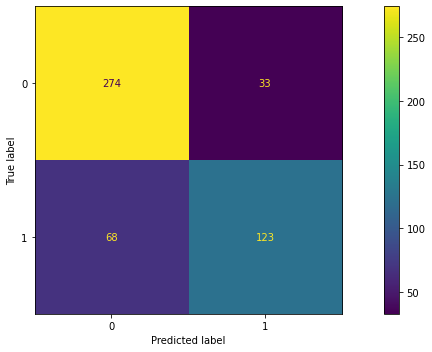

In [49]:
plot_confusion_matrix(knn10, X_train, y_train)

--------------------------------------------------------------------------

# Continue working with Telco